# Bank Marketing  🏛💰

### Variáveis que vamos trabalhar
- Age: Idade do cliente.
- Job: Tipo de trabalho do cliente.
- Marital: Estado civil do cliente.
- Education: Nível de educação do cliente.
- Default: Indicador se o cliente tem crédito em inadimplência.
- Balance: Saldo médio anual do cliente em euros.
- Housing: Indicador se o cliente tem emprestimo habitação.
- Loan: Indicador se o cliente tem empréstimo pessoal.
- Day: Último dia de contato do mês.
- Month: Último mês de contato do ano .
- Duration: Duração do último contato, em segundos.
- Campaign: Número de contatos realizados durante esta campanha e para este cliente, incluindo o último contato.
- odays: Número de dias que se passaram desde que o cliente foi contatado pela última vez em uma campanha anterior (-1 significa que o cliente não foi contatado anteriormente).
- Previous: Número de contatos realizados antes desta campanha e para este cliente.
- Poutcome: Resultado da campanha de marketing anterior .
### Variável Alvo
- Depositou(y): O cliente subscreveu a um depósito a prazo? 

* Explicando a variável depositou:
- Um depósito a prazo(variavel alvo  y) é um tipo de conta de depósito mantida em uma instituição financeira onde o dinheiro fica bloqueado por um determinado período de tempo.
- Os depósitos a prazo são geralmente depósitos de curto prazo com vencimentos que variam de um mês a um ano e oferecem taxas de juro mais elevadas do que as tradicionais contas de poupança.
- O investidor deve entender ao comprar um depósito a prazo que só poderá sacar seus recursos após o término do prazo . Em alguns casos pode permitir ao investidor a rescisão antecipada ou retirada, mas se ele notificar com vários dias de antecedência. Além disso, haverá uma penalidade aplicada por rescisão antecipada.

### Fonte do Dataframe
https://www.kaggle.com/datasets/adilashrafi/bank-marketing-classification-task 

##  Bibliotecas Utilizadas e Importação do Dataframe

In [1]:
# Tratamento de Dados
import pandas as pd
import numpy as np

# Para visualização de dados
import seaborn as sns
import matplotlib.pyplot as plt

# Modelagem
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report

# Desativar todos os avisos
import warnings
warnings.filterwarnings("ignore")


c:\Users\lipef\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# Ler o arquivo e colunas  que serão usadas
df = pd.read_csv("bank_data.csv", usecols=["age", "job", "marital", "education", "default", "balance", "housing", "loan", "contact", "day", "month",
                                           "duration", "campaign", "pdays", "previous", "poutcome", "y"])

# Visualizando cinco amostras aleatórias do Dataframe
df.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
277,38,technician,single,tertiary,no,0,no,no,cellular,28,aug,247,2,-1,0,unknown,no
1598,48,services,single,primary,no,1499,yes,no,cellular,12,may,17,7,-1,0,unknown,no
3600,50,technician,married,secondary,no,0,no,no,cellular,7,jul,152,2,-1,0,unknown,no
1236,32,admin.,single,secondary,no,116,no,yes,cellular,16,jul,255,2,-1,0,unknown,no
1424,32,student,single,tertiary,no,0,no,no,cellular,6,aug,101,5,3,6,other,no


# Exploração e Análise dos Dados

### Renomeando a variável alvo para mais facilidade de compreensão, já que ela é muito importante para nosso modelo !


In [3]:
#Renomeando uma coluna do Dataframe
df.rename(columns={'y': "depositou"}, inplace=True)

#Verificando os tipos de dados das colunas, o tamanho do arquivo e a quantidade de linhas e colunas do Dataframe
df.info()     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  depositou  4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [4]:
#Checagem de números vázios. 
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
depositou    0
dtype: int64

In [5]:
#Descrição estatística, arredondada para melhor visualização 
df.describe().round(2)

,age,balance,day,duration,campaign,pdays,previous
count,4521.00,4521.00,4521.00,4521.00,4521.00,4521.00,4521.00
mean,41.17,1422.66,15.92,263.96,2.79,39.77,0.54
std,10.58,3009.64,8.25,259.86,3.11,100.12,1.69
min,19.00,-3313.00,1.00,4.00,1.00,-1.00,0.00
25%,33.00,69.00,9.00,104.00,1.00,-1.00,0.00
50%,39.00,444.00,16.00,185.00,2.00,-1.00,0.00
75%,49.00,1480.00,21.00,329.00,3.00,-1.00,0.00
max,87.00,71188.00,31.00,3025.00,50.00,871.00,25.00


- Com este describe, aparentemente temos algumas anomalias. O número mais alto em relação aos outros é o saldo (balance), com 71 mil euros. Mais tarde, vamos verificar outras anomalias.

- Falando ainda sobre o saldo, vemos que 25% dos clientes têm menos de £69,00.

- Logo, percebemos que 75% dos clientes têm abaixo de 49 anos, e a mediana é de 39 anos, muito próxima da mediana de 41 anos, mostrando que não lidamos com um publico tão alto de idosos ...

In [6]:
#Números de clientes com saldo acima de £30.000 
(df["balance"]>30000).sum() 

2

In [7]:
# Avaliando números de pessoas com saldo negativo 
(df["balance"]<0).sum()

366

### Vamos trabalhar bastante com variáveis categoricas.

In [8]:
#Valores distintos por coluna
df.nunique().sort_values()    

depositou       2
loan            2
housing         2
default         2
contact         3
marital         3
poutcome        4
education       4
job            12
month          12
previous       24
day            31
campaign       32
age            67
pdays         292
duration      875
balance      2353
dtype: int64

- Plotando um histograma de todas as variáveis. Com esse histograma, consigo ver como estão distribuídas e sua frequência.

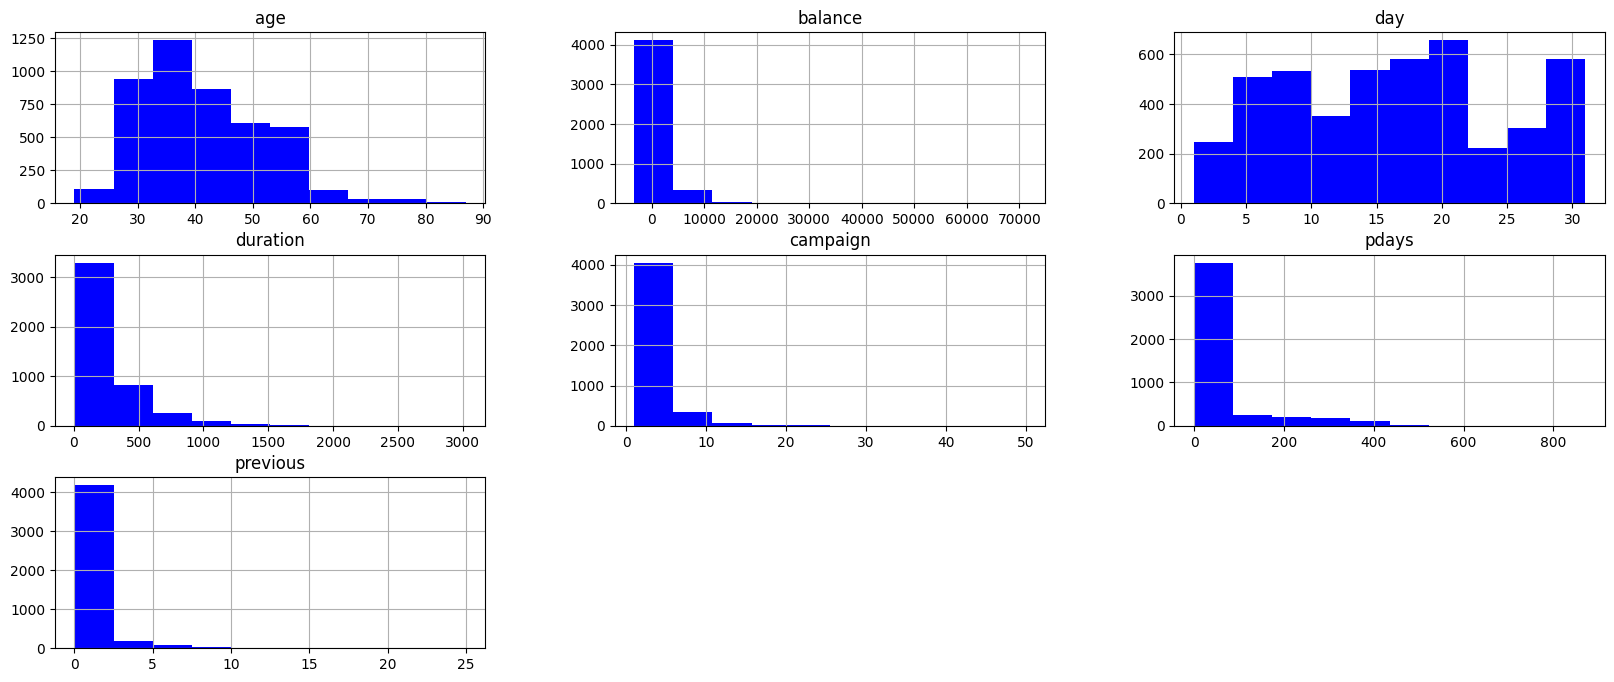

In [9]:
#Histograma
df.hist(figsize=(20,8), color="b")

plt.show()


In [10]:
#Visualizando 5 primeiras linhas
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,depositou
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [11]:
#Quantidade de pessoas que depositou e não fez o investimento
df["depositou"].value_counts(1)*100

depositou
no     88.476001
yes    11.523999
Name: proportion, dtype: float64

In [12]:
#Distinção da coluna trabalho
df["job"].unique()

array(['unemployed', 'services', 'management', 'blue-collar',
       'self-employed', 'technician', 'entrepreneur', 'admin.', 'student',
       'housemaid', 'retired', 'unknown'], dtype=object)

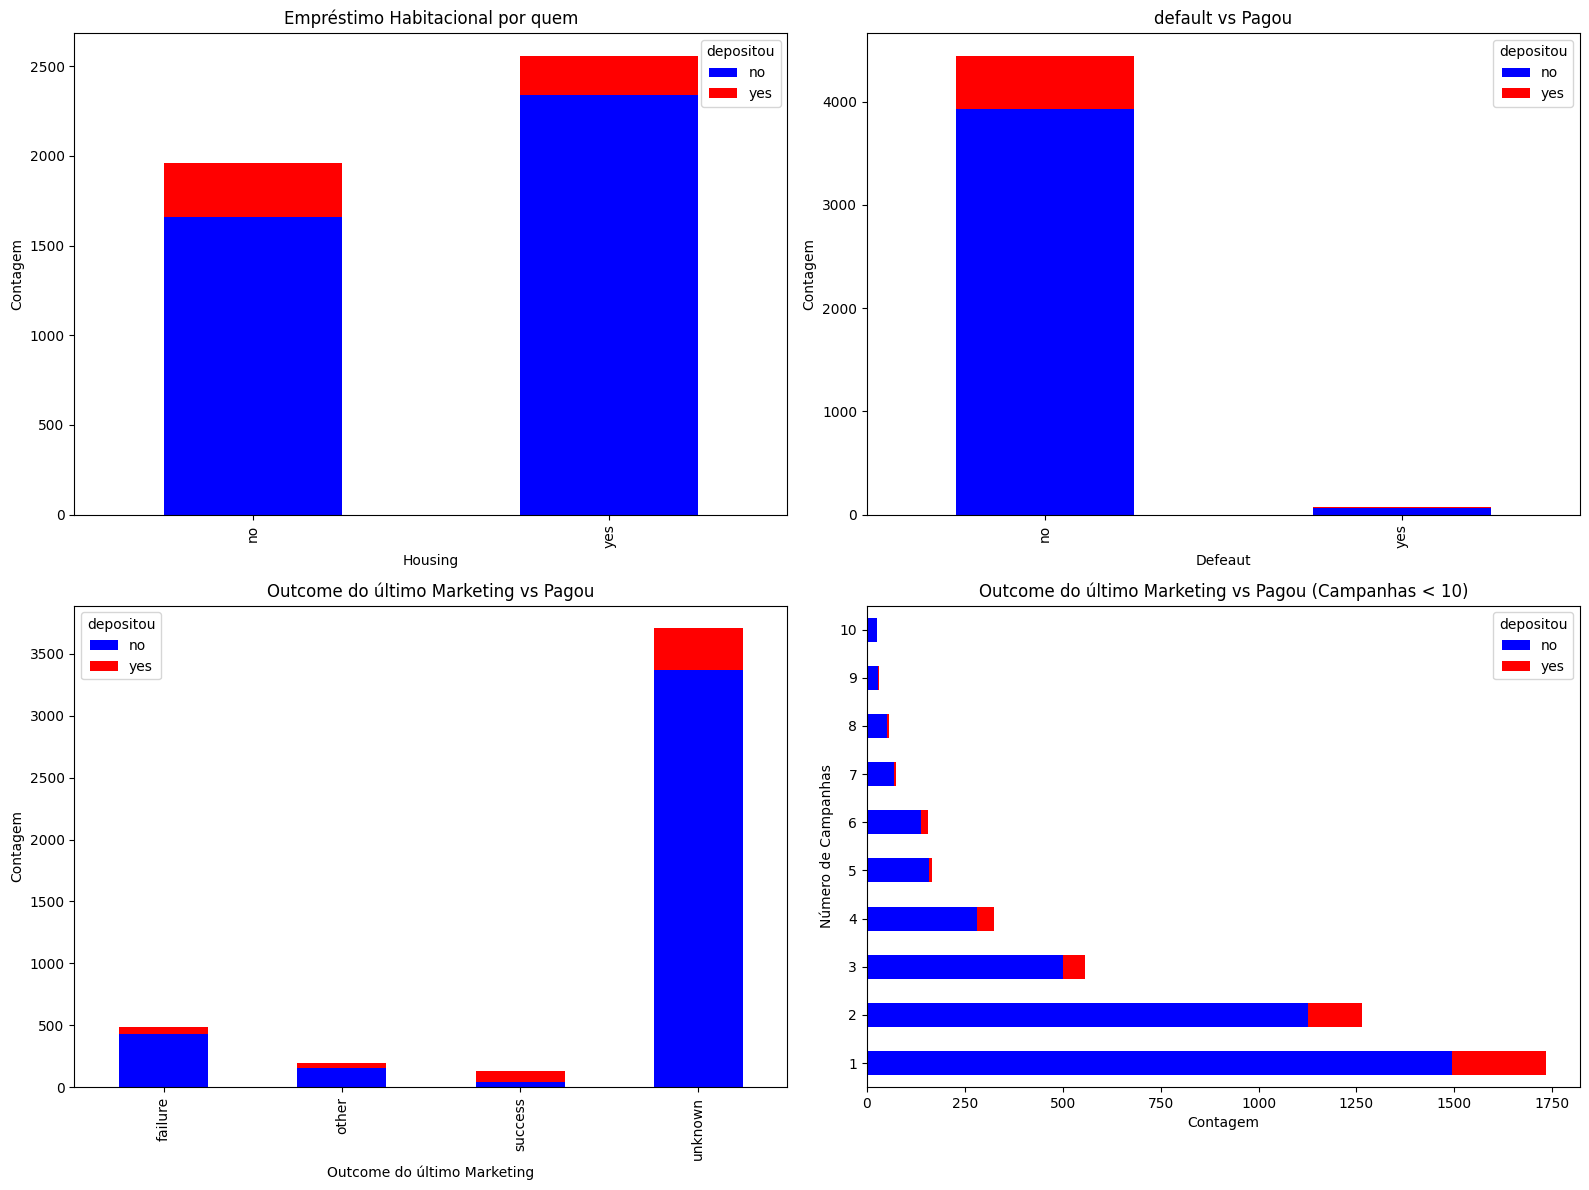

In [13]:
# Criando os subplots
fig, ax = plt.subplots(2, 2, figsize=(16, 12))

# Gráfico 1: Comparação entre "housing" e "depositou"
df.groupby(["housing", "depositou"]).size().unstack().plot(kind="bar", stacked=True, ax=ax[0, 0], color=["b", "r"])
ax[0, 0].set_title("Empréstimo Habitacional por quem")
ax[0, 0].set_xlabel('Housing')
ax[0, 0].set_ylabel('Contagem')

# Gráfico 2: Comparação entre "default" e "depositou"
df.groupby(["default", "depositou"]).size().unstack().plot(kind='bar', stacked=True, ax=ax[0, 1], color=["b", "r"])
ax[0, 1].set_title('default vs Pagou')
ax[0, 1].set_xlabel('Defeaut')
ax[0, 1].set_ylabel('Contagem')

# Gráfico 3: Comparação entre "poutcome" e "depositou"
df.groupby(["poutcome", "depositou"]).size().unstack().plot(kind='bar', stacked=True, ax=ax[1, 0], color=["b", "r"])
ax[1, 0].set_title('Outcome do último Marketing vs Pagou')
ax[1, 0].set_xlabel('Outcome do último Marketing')
ax[1, 0].set_ylabel('Contagem')

# Filtrando dados para campanhas menores que 10
df_tcampa = df[df["campaign"] < 11]

# Gráfico 4: Comparação entre "campaign" e "depositou"
df_tcampa.groupby(["campaign", "depositou"]).size().unstack().plot(kind='barh', stacked=True, ax=ax[1, 1], color=["b", "r"])
ax[1, 1].set_title('Outcome do último Marketing vs Pagou (Campanhas < 10)')
ax[1, 1].set_xlabel('Contagem')
ax[1, 1].set_ylabel('Número de Campanhas')

# Ajustando o layout
plt.tight_layout()
# Exibindo os gráficos
plt.show()


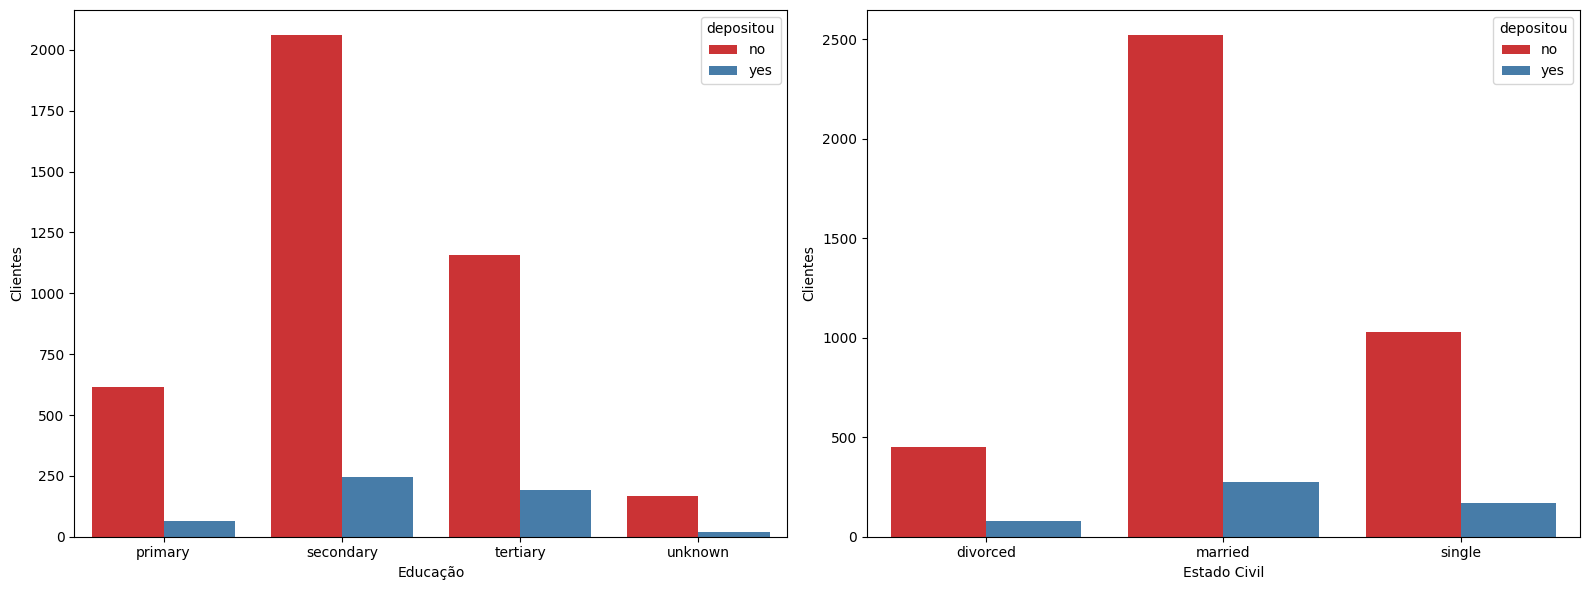

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

sns.barplot(x="education", y="count", hue="depositou", data=df.groupby(["education", "depositou"]).size().reset_index(name="count"), ax=ax[0], palette="Set1")

ax[0].set_xlabel("Educação")
ax[0].set_ylabel("Clientes")

sns.barplot(x="marital", y="count", hue="depositou", data=df.groupby(["marital", "depositou"]).size().reset_index(name="count"), ax=ax[1], palette="Set1")

ax[1].set_xlabel("Estado Civil")
ax[1].set_ylabel("Clientes")

plt.tight_layout()
plt.show()


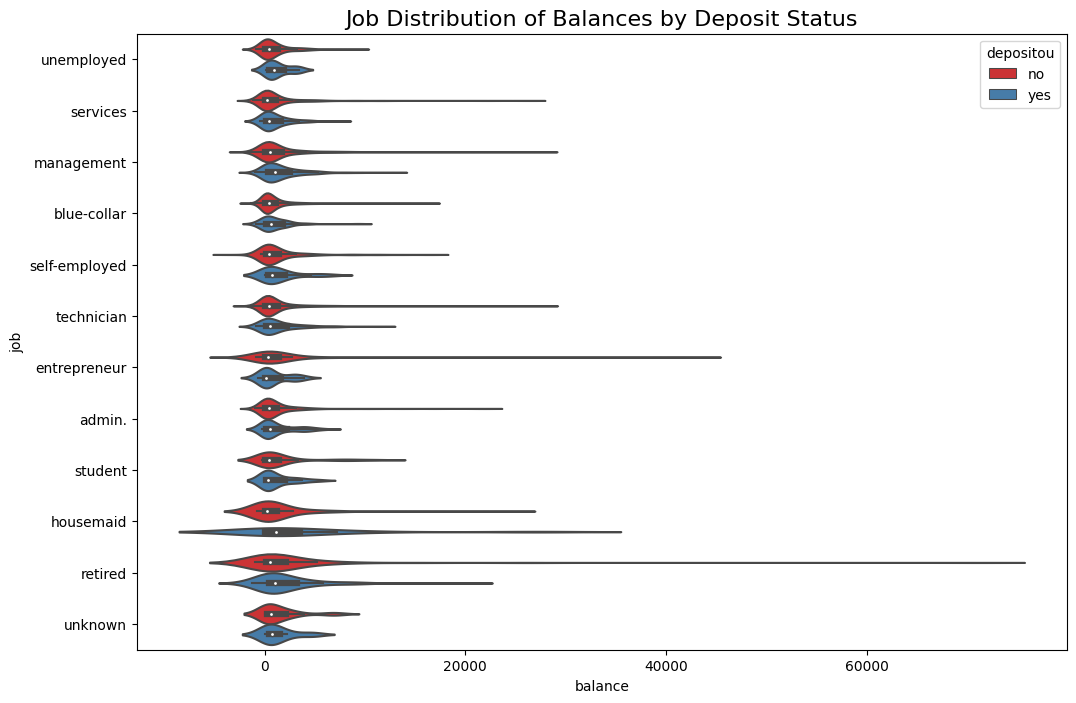

In [15]:
fig = plt.figure(figsize=(12,8))

sns.violinplot(x="balance", y="job", hue="depositou", palette="Set1",
            data=df);

plt.title("Job Distribution of Balances by Deposit Status", fontsize=16)

plt.show()

Text(0.5, 1.0, 'Depositou')

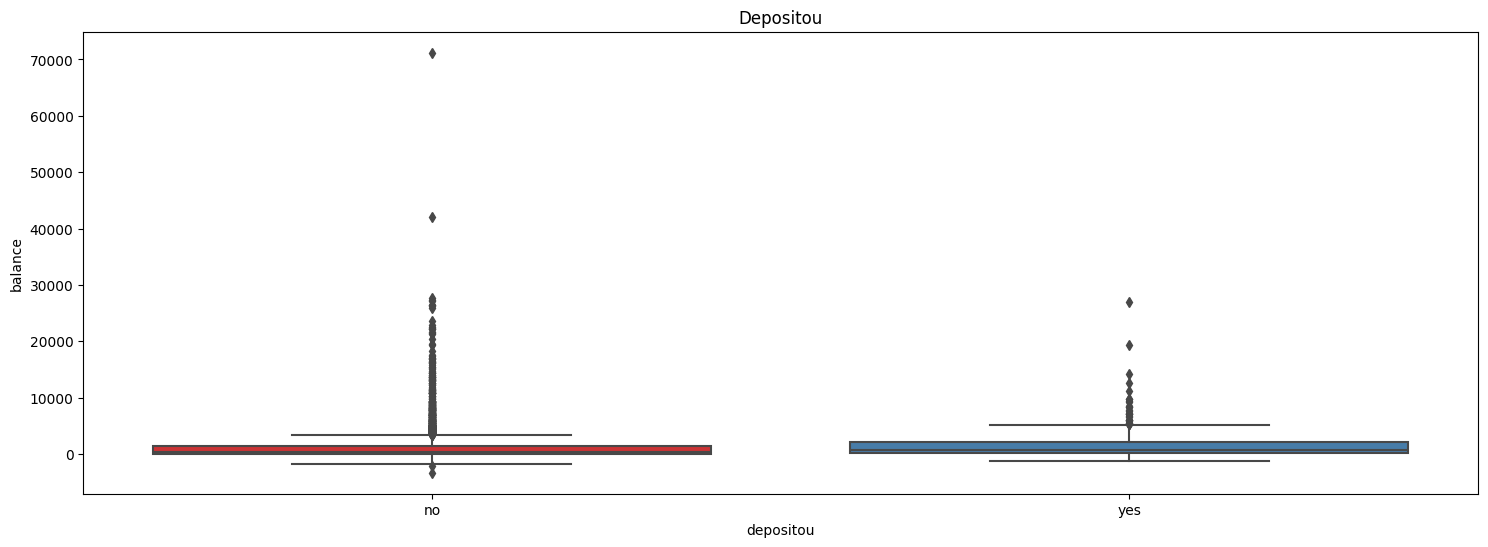

In [16]:
# Plotar o boxplot para 'balance' na segunda célula da grade
fig= plt.figure(figsize=(18,6))
sns.boxplot(x="depositou", y="balance", data=df, palette="Set1")
plt.title("Depositou")

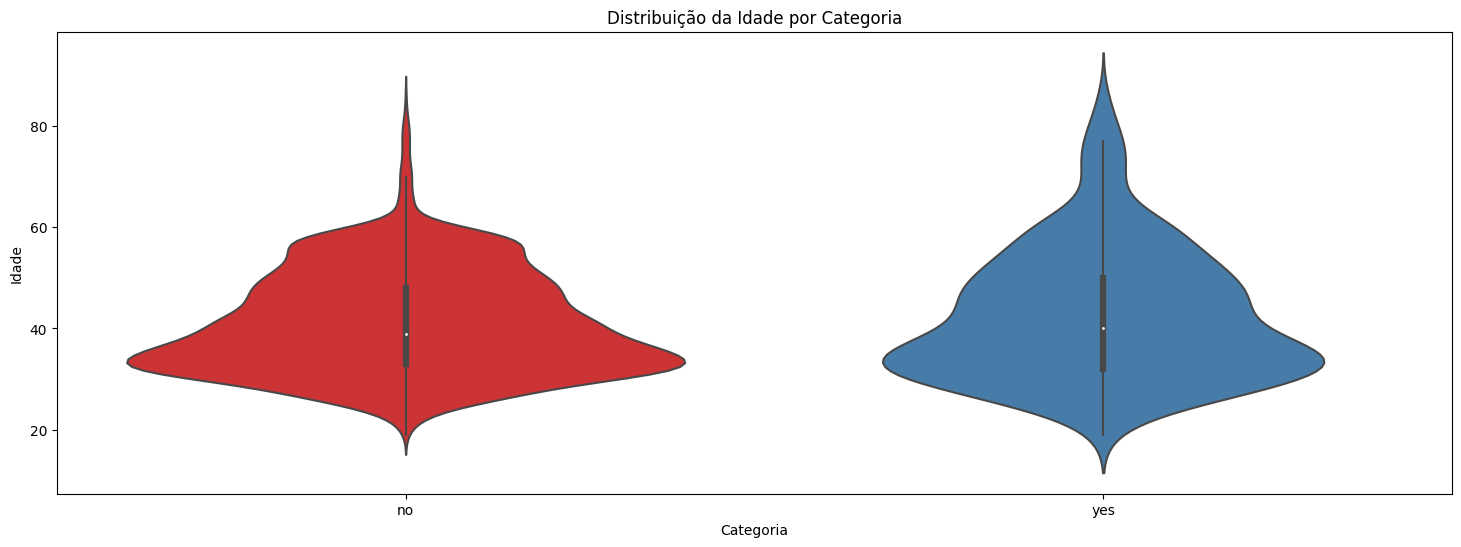

In [17]:
# Violin plot
plt.figure(figsize=(18, 6))
sns.violinplot(x='depositou', y='age',palette="Set1", data=df)
plt.title('Distribuição da Idade por Categoria')
plt.xlabel('Categoria')
plt.ylabel('Idade')
plt.show()

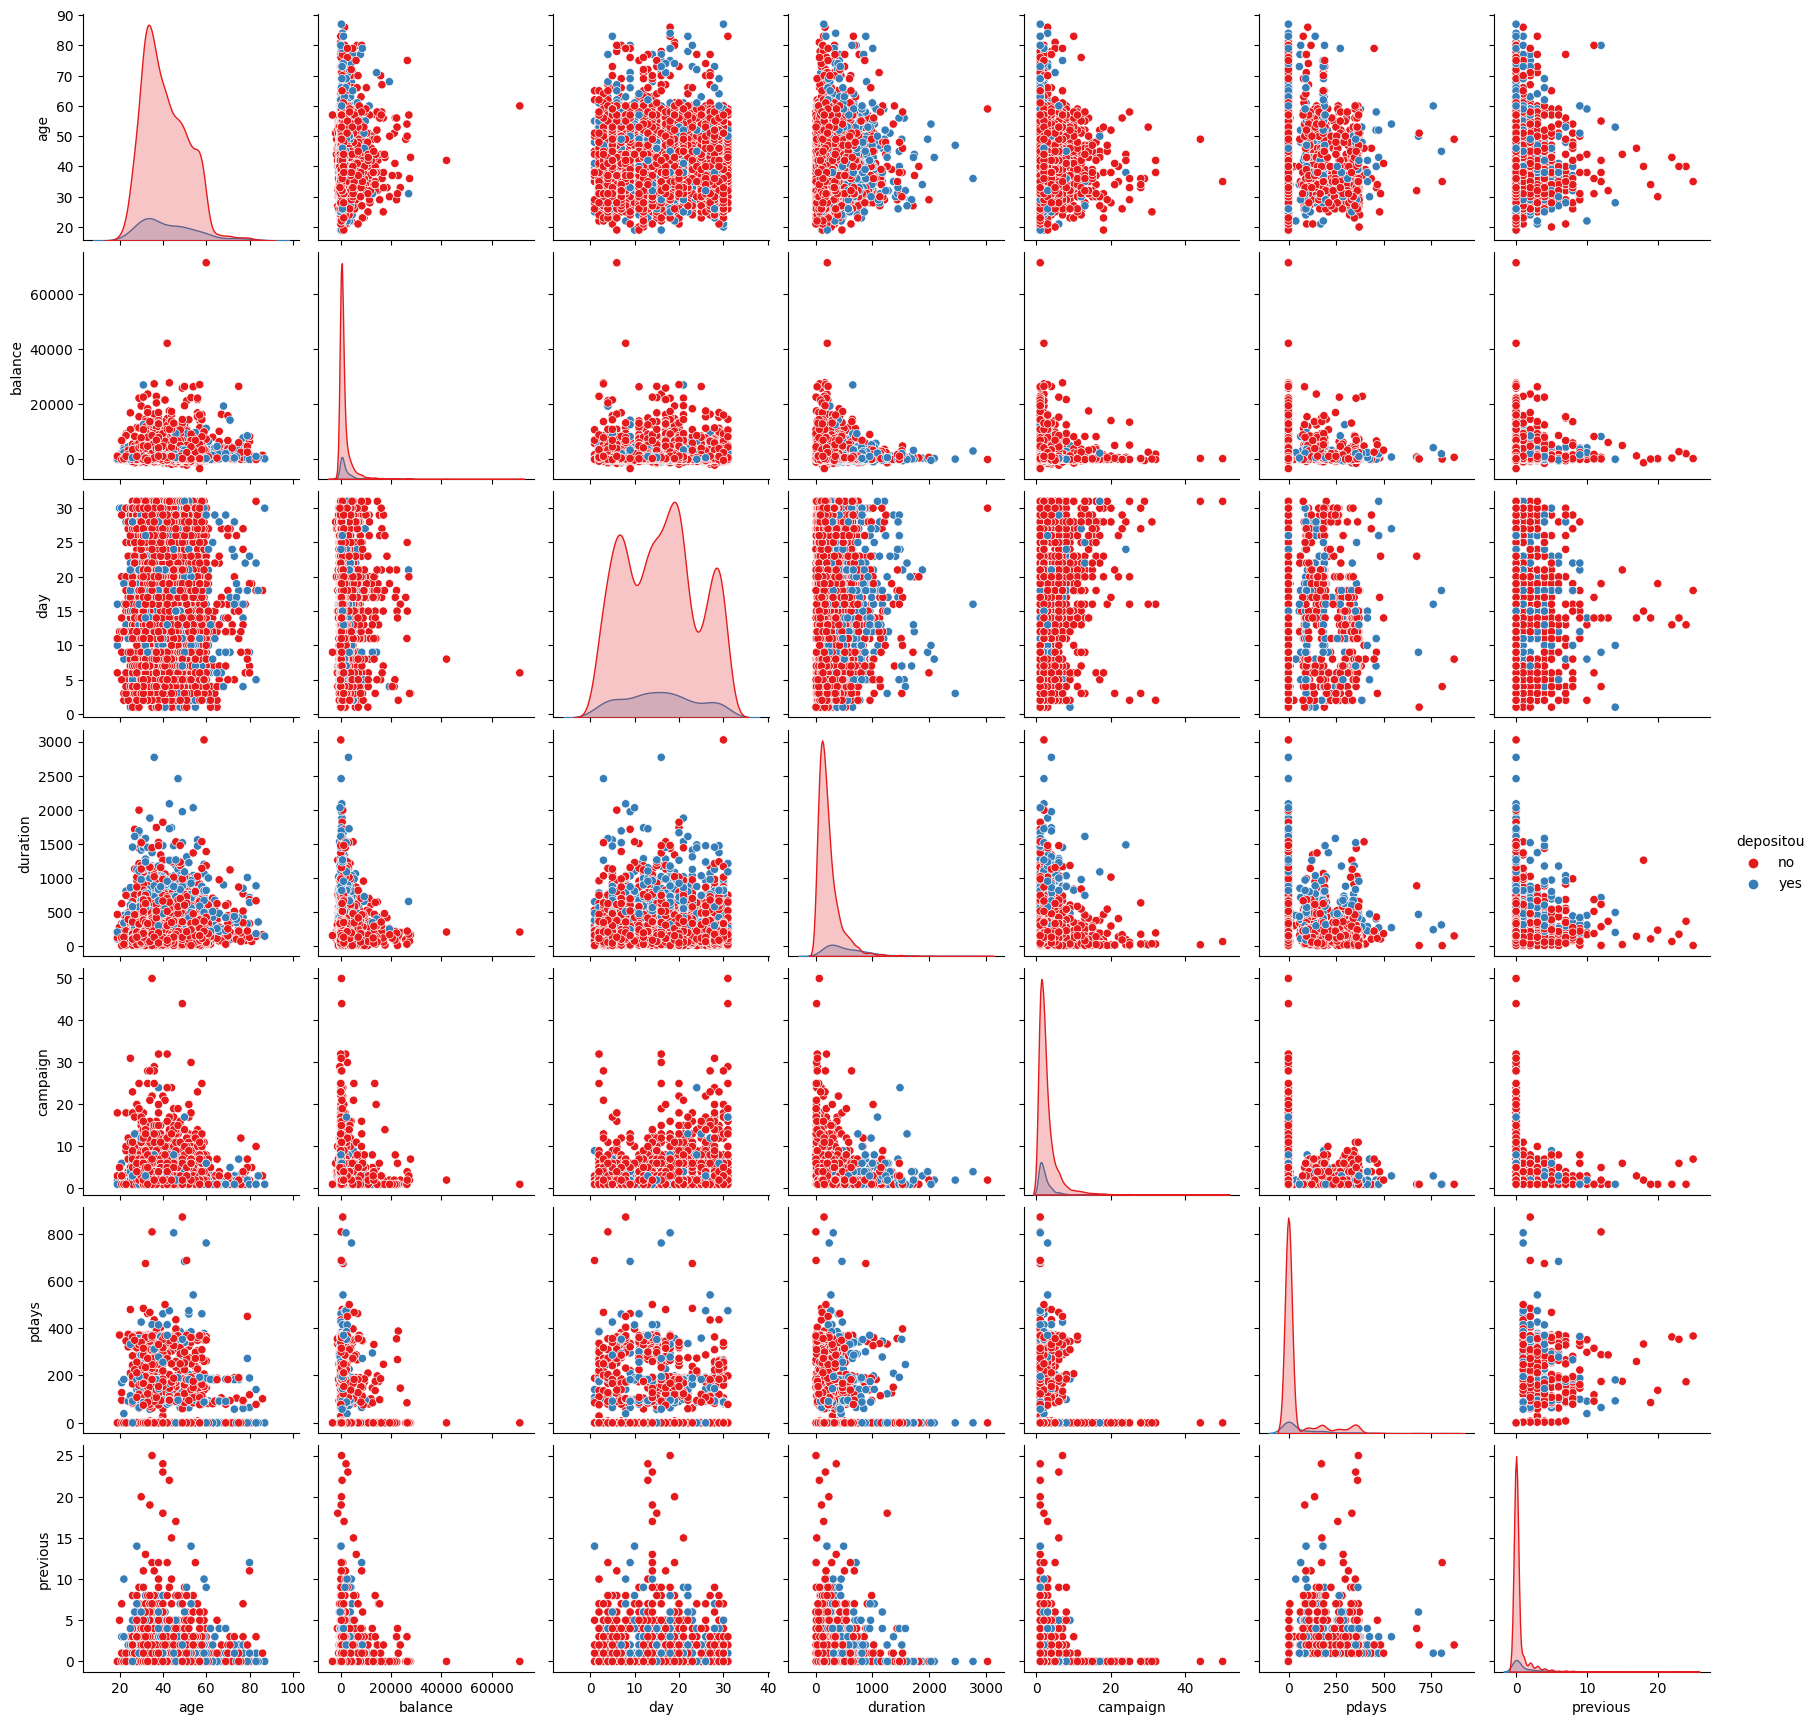

In [18]:
sns.pairplot(df, hue='depositou', palette="Set1" )
plt.show()          


In [19]:
df['depositou'] = df['depositou'].map({'yes': 1, 'no': 0})
df_numerico = df.select_dtypes(include=['number'])
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
depositou     int64
dtype: object

In [20]:
df_numerico.head()

,age,balance,day,duration,campaign,pdays,previous,depositou
0,30,1787,19,79,1,-1,0,0
1,33,4789,11,220,1,339,4,0
2,35,1350,16,185,1,330,1,0
3,30,1476,3,199,4,-1,0,0
4,59,0,5,226,1,-1,0,0


<Figure size 1600x600 with 0 Axes>

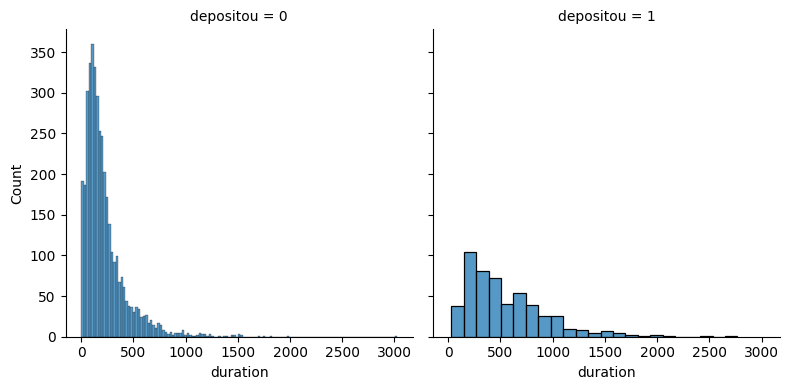

In [21]:
plt.figure(figsize=(16,6))
# Criar um FacetGrid
his = sns.FacetGrid(df, col="depositou", height=4)

# Mapear o histograma para a coluna "age"
his.map(sns.histplot, "duration")

# Mostrar o FacetGrid
plt.show()

In [22]:
corr = df_numerico.corr()
corr.style.background_gradient(cmap="coolwarm")

,age,balance,day,duration,campaign,pdays,previous,depositou
age,1.000000,0.083820,-0.017853,-0.002367,-0.005148,-0.008894,-0.003511,0.045092
balance,0.083820,1.000000,-0.008677,-0.015950,-0.009976,0.009437,0.026196,0.017905
day,-0.017853,-0.008677,1.000000,-0.024629,0.160706,-0.094352,-0.059114,-0.011244
duration,-0.002367,-0.015950,-0.024629,1.000000,-0.068382,0.010380,0.018080,0.401118
campaign,-0.005148,-0.009976,0.160706,-0.068382,1.000000,-0.093137,-0.067833,-0.061147
pdays,-0.008894,0.009437,-0.094352,0.010380,-0.093137,1.000000,0.577562,0.104087
previous,-0.003511,0.026196,-0.059114,0.018080,-0.067833,0.577562,1.000000,0.116714
depositou,0.045092,0.017905,-0.011244,0.401118,-0.061147,0.104087,0.116714,1.000000


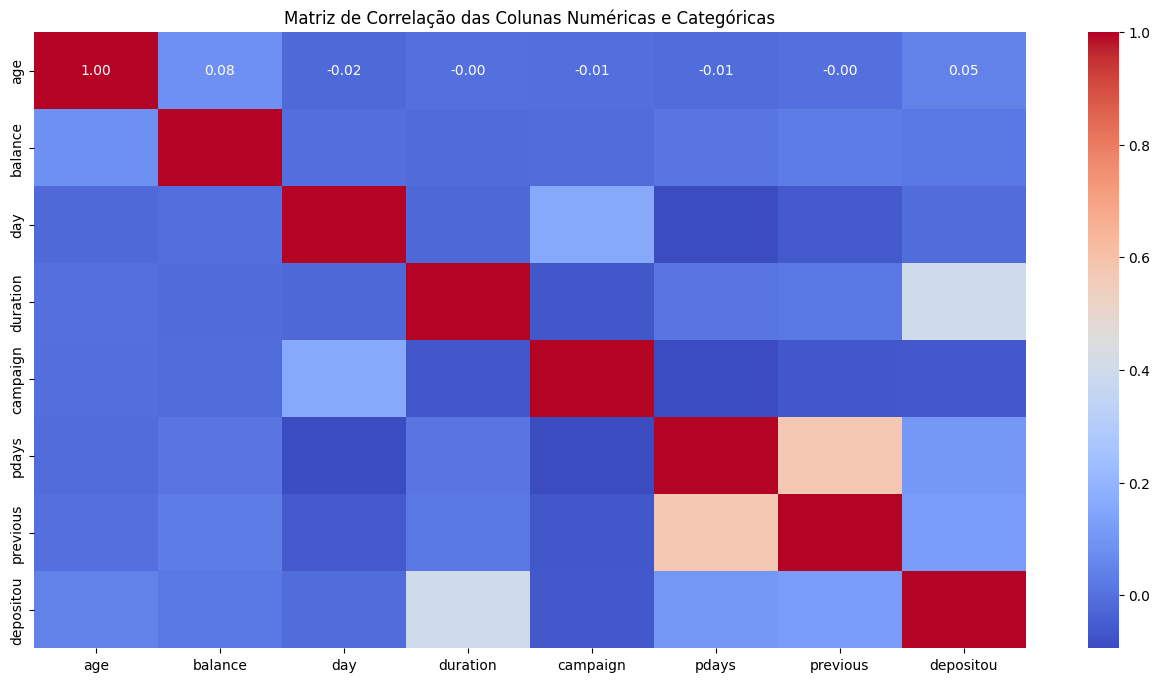

In [23]:
plt.figure(figsize=(16, 8))
sns.heatmap(df_numerico.corr(), cmap="coolwarm", annot=True, fmt=".2f", annot_kws={"size": 10})
plt.title("Matriz de Correlação das Colunas Numéricas e Categóricas")
plt.show()

In [24]:
clf = DecisionTreeClassifier()

In [25]:
df_categorico=[["job","marital", "education", "default", "housing", "loan", "month",  "campaign", "previous",  "poutcome"]]

In [26]:
df_numerico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        4521 non-null   int64
 1   balance    4521 non-null   int64
 2   day        4521 non-null   int64
 3   duration   4521 non-null   int64
 4   campaign   4521 non-null   int64
 5   pdays      4521 non-null   int64
 6   previous   4521 non-null   int64
 7   depositou  4521 non-null   int64
dtypes: int64(8)
memory usage: 282.7 KB


In [27]:
X_train, X_test, y_train, y_test = train_test_split(df_numerico.drop("depositou",axis=1),df_numerico["depositou"],test_size=0.3)

In [28]:
X_train.shape,X_test.shape

((3164, 7), (1357, 7))

In [29]:
y_train.shape,y_test.shape

((3164,), (1357,))

In [30]:
clf = DecisionTreeClassifier()

In [31]:
clf=clf.fit(X_train,y_train)

In [32]:
clf.feature_importances_

array([0.12346093, 0.19704135, 0.12402808, 0.3744227 , 0.05137237,
       0.12269953, 0.00697504])

In [33]:
previsoes=pd.DataFrame

In [34]:
for feature, importancia in zip (df_numerico.columns, clf.feature_importances_):
    print(" {}:{}".format(feature, importancia))

 age:0.12346092862800702
 balance:0.1970413453923531
 day:0.12402808355921509
 duration:0.37442270132421923
 campaign:0.051372373386196546
 pdays:0.1226995308175024
 previous:0.006975036892506597


In [35]:
resultado= clf.predict(X_test)
print(resultado)

[0 0 0 ... 0 0 0]


AVALIAÇÃO DO MODELO

In [36]:
clf.score(X_test, y_test)

0.8526160648489315

In [37]:
print(metrics.classification_report(y_test, resultado))

              precision    recall  f1-score   support

           0       0.93      0.90      0.92      1208
           1       0.36      0.45      0.40       149

    accuracy                           0.85      1357
   macro avg       0.65      0.68      0.66      1357
weighted avg       0.87      0.85      0.86      1357



In [38]:
from ipywidgets import interactive
from IPython.display import SVG,display
from graphviz import Source
from sklearn.tree import export_graphviz


In [39]:
import pydot
import graphviz

In [40]:
X, y = df_numerico.drop("depositou", axis=1), df_numerico["depositou"]
features_label = df_numerico.drop("depositou", axis=1).columns
class_label = ["0", "1"]

def plot_tree(crit, split, depth, min_samples_split, min_samples_leaf=0.2):
    estimador = DecisionTreeClassifier(
        random_state=0,
        criterion=crit,
        splitter=split,
        max_depth=depth,
        min_samples_split=min_samples_split
    )
    estimador.fit(X, y)
    graph = Source(export_graphviz(estimador,
                                   out_file=None,
                                   feature_names=features_label,
                                   class_names=class_label,
                                   impurity=True,
                                   filled=True))
    display(SVG(graph.pipe(format="svg")))
    return estimador

inter = interactive(plot_tree,
                    crit=["gini", "entropy"],
                    split=["best", "random"],
                    depth=[1, 2, 3, 4, 5, 20, 30],  # Ajustei a lista, removi o 3 repetido
                    min_samples_split=(1, 5),
                    min_samples_leaf=(1, 5))

display(inter)

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

In [41]:
from sklearn.metrics import confusion_matrix

In [42]:
cm = confusion_matrix(resultado, y_test)
cm

array([[1090,   82],
       [ 118,   67]], dtype=int64)

Text(1.3, 1.5, 'TN')

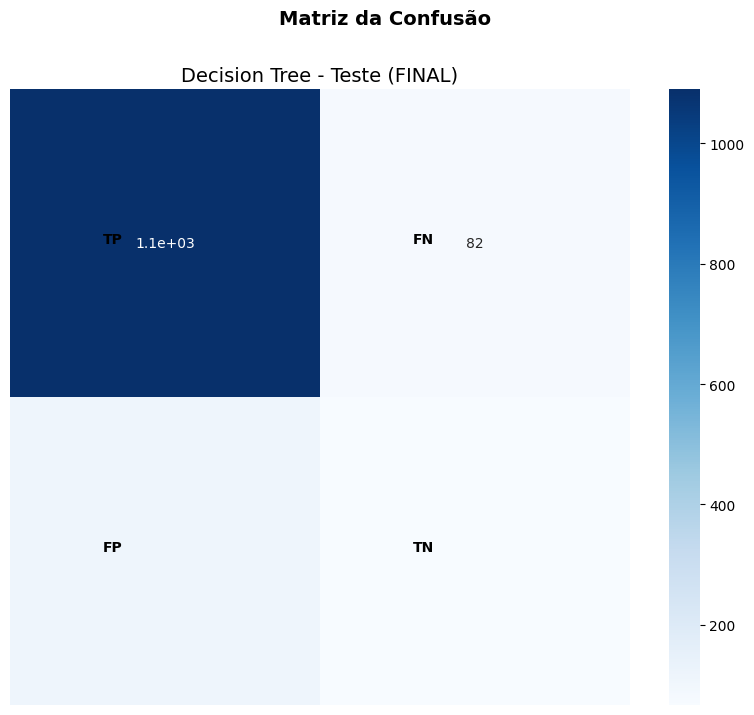

In [43]:
modelo_title = "Decision Tree - Teste (FINAL)"
fig= plt.figure(figsize=(10,8))
fig.suptitle("Matriz da Confusão", fontsize=14, fontweight="bold")

sns.heatmap(cm, cmap="Blues", annot=True)
plt.title(modelo_title, fontsize=14)
plt.xticks([])
plt.yticks([])
plt.annotate("TP",(0.3,0.5), fontweight="bold")
plt.annotate("FN",(1.3,0.5), fontweight="bold")
plt.annotate("FP",(0.3,1.5), fontweight="bold")
plt.annotate("TN",(1.3,1.5), fontweight="bold")